In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing

### Loading data

In [2]:
filename = '../../Dataset/heartbeatFeaturesB4.csv'
df = pd.read_csv(filename)

# Remove the extra column read

toremove = df.shape[1] -1 
df = df.iloc[:, 0:toremove]
df.head()

,stdPCA1,stdPCA2,stdPCA3,meanPCA1,meanPCA2,meanPCA3,meanS1,meanS2,stdS1,stdS2,...,minstdS1,maxstdS1,mmstdS1,minstdS2,maxstdS2,mmstdS2,posRatio,stdWavelet,meanWavelet,class
0,2.925073,1.603105,1.107265,-1.327246e-16,-2.224033e-17,2.511005e-18,472.0000,519.0000,26.57066,28.81666,...,24.65675,22.15827,20.00486,23.79636,25.31929,19.62142,0.086957,0.143258,-0.016102,Normal
1,3.003149,1.398531,1.245671,3.994780e-17,-5.461219e-17,-3.146381e-17,476.2105,480.1579,79.44780,79.73795,...,58.73258,79.29658,58.02636,60.56134,80.77381,61.31806,0.000000,0.164868,0.020342,Normal
2,2.906362,1.612006,1.189551,-2.873518e-17,4.745659e-17,1.567374e-17,489.6667,509.6250,21.94311,27.64023,...,16.47021,20.52481,14.64988,24.01983,24.41311,20.72116,0.000000,0.291671,-0.025297,Normal
3,2.915212,1.579173,1.217206,-1.107815e-17,-1.628307e-16,9.801752e-17,477.5000,491.7647,30.51374,17.26097,...,27.18428,28.52656,25.01699,14.72356,15.16122,12.24434,0.000000,0.077379,-0.000735,Normal
4,3.027328,1.368556,1.143924,-1.072735e-16,1.499522e-17,2.854859e-17,1364.5000,2427.0000,20.50610,0.00000,...,20.50610,20.50610,20.50610,0.00000,0.00000,0.00000,0.750000,0.064384,0.002975,Normal


# Some stats

In [3]:
df.shape

(312, 27)

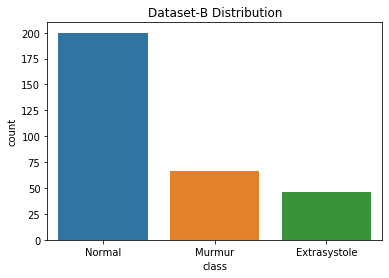

In [4]:
plot = sns.countplot(x='class', data=df).set_title('Dataset-B Distribution').get_figure()

### Column Selections - Inputs and Labels

In [5]:
# Only take this select set of features from the Dataset A

X = df.iloc[:,0:17]
X[['maxstdS1', 'maxstdS2', 'mmstdS1', 'mmstdS2']] = df[['maxstdS1', 'maxstdS2','mmstdS1', 'mmstdS2']]
X[['posRatio','stdWavelet','meanWavelet']] = df[['posRatio','stdWavelet','meanWavelet']]

# Normalise the features

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
x_dim = X.shape[1]

# Rename the columns

X.columns = [ 'stdPCA1', 'stdPCA2', 'stdPCA3', 'meanPCA1', 
               'meanPCA2', 'meanPCA3', 'meanS1', 'meanS2', 
          'stdS1', 'stdS2','rebuilError', 'ratios','stdFFTSHA' ,
          'lenFFTSHA', 'stdlenFFTSHA' ,'lenstdFFTSHA' ,'posFFT',
         'maxstdS1', 'maxstdS2', 'mmstdS1', 'mmstdS2',
         'posRatio','stdWavelet','meanWavelet']

X.head()

,stdPCA1,stdPCA2,stdPCA3,meanPCA1,meanPCA2,meanPCA3,meanS1,meanS2,stdS1,stdS2,...,stdlenFFTSHA,lenstdFFTSHA,posFFT,maxstdS1,maxstdS2,mmstdS1,mmstdS2,posRatio,stdWavelet,meanWavelet
0,0.638786,0.409461,0.503370,0.263359,0.366913,0.404606,0.063191,0.047157,0.039061,0.026406,...,0.016750,0.028118,0.173913,0.032574,0.029471,0.029409,0.017980,0.096618,0.223323,0.222477
1,0.727809,0.236116,0.786586,0.446894,0.282429,0.320283,0.064612,0.039029,0.116794,0.073067,...,0.064188,0.006984,0.304348,0.116572,0.094018,0.085303,0.056188,0.000000,0.264409,0.318822
2,0.617452,0.417003,0.671749,0.373890,0.548808,0.437275,0.069153,0.045195,0.032258,0.025328,...,0.233871,0.001569,0.130435,0.030173,0.028416,0.021536,0.018988,0.000000,0.505492,0.198169
3,0.627543,0.389182,0.728339,0.392658,0.000000,0.641646,0.065047,0.041458,0.044858,0.015817,...,0.211261,0.001788,0.347826,0.041936,0.017647,0.036777,0.011220,0.000000,0.098073,0.263103
4,0.755378,0.210717,0.578384,0.290411,0.464090,0.469229,0.364380,0.446460,0.030146,0.000000,...,0.004540,0.105028,0.130435,0.030146,0.000000,0.030146,0.000000,0.833333,0.073366,0.272911


In [6]:
# For testing later on ....at In [26]  -- In [27]

np.set_printoptions(suppress=True)
P = X.values[201:212,:]

In [7]:
# Get the classes

Y = df.iloc[:,toremove-1:toremove]
print(Y['class'].unique())

['Normal' 'Murmur' 'Extrasystole']


In [8]:
# Condition the classes for Training

encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Data Split - Training and Testing Sets

In [9]:
s_rand_state = 'NULL'

# X,Y = shuffle(X,Y,random_state=s_rand_state)

In [10]:
tt_rand_state = 0

X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = tt_rand_state)


## Frequency Distribution of classes

In [11]:
train_outcome = pd.crosstab(index = Y_train, columns = "count")
test_outcome = pd.crosstab(index = Y_test, columns = "count")

print('Train distribution: ','\n',train_outcome,'\n\n\t\n\n','Test distribution: ','\n',test_outcome)

Train distribution:  
 col_0  count
row_0       
0         43
1         45
2        161 

	

 Test distribution:  
 col_0  count
row_0       
0          3
1         21
2         39


In [12]:
# Dimension of Train and Test set 

print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")


Dimension of Train set (249, 24)
Dimension of Test set (63, 24) 



In [13]:
#Total Number of Continous and Categorical features in the training set

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 24


## Parameter Tuning

In [14]:
# Hyperparameter tuning using grid search and cross validation

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

### Training SVM model using radial kernel

In [15]:
svm_model = GridSearchCV(SVC(probability=True), params_grid, cv = 5)
#svm_model = SVC()
#train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel = 'linear'),X_train, Y_train, cv = 5)
svm_model.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
# View the best parameters for the model found using grid search

print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")


Best C: 10 

Best Kernel: linear 

Best Gamma: auto_deprecated 



In [17]:
# Build the final model

final_model = svm_model.best_estimator_

## Confusion Matrix and Accuracy score

In [18]:
# Get the predicted scores

Y_pred = final_model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.7777777777777778


In [19]:
# Making the Confusion Matrix

print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

Training_score = final_model.score(X_train , Y_train)
Testing_score  = final_model.score(X_test  , Y_test )

print("Training set score for SVM: %f" % Training_score)
print("Testing  set score for SVM: %f" % Testing_score)

svm_model.score

[[ 0  0  3]
 [ 0 13  8]
 [ 1  2 36]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.62      0.72        21
           2       0.77      0.92      0.84        39

    accuracy                           0.78        63
   macro avg       0.54      0.51      0.52        63
weighted avg       0.76      0.78      0.76        63

Training set score for SVM: 0.726908
Testing  set score for SVM: 0.777778


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [20]:
# Loggin runs....

with open('./Logs/B_SVM_stats.log', 'a+') as f:
            f.write('\n==============================================================\n' + filename  +'\n\n' + 'Shuffle rand state: '+ str(s_rand_state)+'\n'+ 'Test Train rand state : '+ str(tt_rand_state) +'\n\n'+ str(confusion_matrix(Y_test,Y_pred)) +'\n\n' + 'Dimensions: ' + str(x_dim) + '\n'+ 'Testing Accuracy: ' + str(final_model.score(X_test  , Y_test )) + ' Training Acc: ' + str(final_model.score(X_train , Y_train)) + '\nTesting Score: '+ str(accuracy_score(Y_test,Y_pred)) + '\n\n' + classification_report(Y_test,Y_pred))

# Saving The Model


In [21]:
import pickle

In [22]:
trs = str(int(Training_score*100))
tss = str(int(Testing_score*100))

In [23]:
model_name_ = '../../Models/B_SVM_tss_' + tss + '_trs_' + trs
print(model_name_)

../../Models/B_SVM_tss_77_trs_72


In [24]:
model = open(model_name_ + '.pkl', "wb")
pickle.dump(svm_model,model)
model_pkl = open(model_name_ + '.pkl', "rb")
model_test = pickle.load(model_pkl)

In [25]:
# model_test.predict_proba(P)

In [26]:
model_test.predict(P)

array([2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1])